# Project: Wrangle and Analyze Data

In [2]:
# import all packages required for data wrangling and data analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests # HTTP library for python
import os # interact with the file system
from io import BytesIO # read and write bytes data in-memory
from PIL import Image # python imaging library
import json #read and write to json file
import glob # file names search
from bs4 import BeautifulSoup # import BeautifulSoup
from datetime import datetime, date
sns.set_style('darkgrid')

### Table of Content

<ul>
<li><a href="#Gathering">Data Gathering</a></li>
<li><a href="#Assessing">Assessing Data</a></li>
<li><a href="#Cleaning">Cleaning Data</a></li>
<li><a href="#Analyzing">Analyzing and Visualizing Data</a></li>
<li><a href="#Storing">Storing Data</a></li>
<li><a href="#Visualization">Visualization</a></li>
</ul>

<a id='Gathering'></a>
## Data Gathering

1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [3]:
archive_data = pd.read_csv('twitter-archive-enhanced.csv')
archive_data.shape

(2356, 17)

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [4]:
filename = 'image_predictions.tsv'
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
with open(filename, mode='wb') as localfile:     localfile.write(response.content)

In [5]:
# read the image_predictions.tsv file into a pandas dataframe

image_predictions_data = pd.read_csv('image_predictions.tsv', sep='\t')
image_predictions_data.shape

(2075, 12)

3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [6]:
# import tweepy
# from tweepy import OAuthHandler
# import json
# from timeit import default_timer as timer

# # Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# # These are hidden to comply with Twitter's API terms and conditions
# consumer_key = 'HIDDEN'
# consumer_secret = 'HIDDEN'
# access_token = 'HIDDEN'
# access_secret = 'HIDDEN'

# auth = OAuthHandler(consumer_key, consumer_secret)
# auth.set_access_token(access_token, access_secret)

# api = tweepy.API(auth, wait_on_rate_limit=True)

# # Tweet IDs for which to gather additional data via Twitter's API
# tweet_id_list = list(archive_data.tweet_id)
# len(tweet_id_list)

# # Query Twitter's API for JSON data for each tweet ID in the Twitter archive
# count = 0
# fails_dict = {}
# start = timer()
# # Save each tweet's returned JSON as a new line in a .txt file
# with open('tweet_json.txt', 'w') as localfile:
#     # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
#     for tweet_id in tweet_id_list:
#         count += 1
#         print(str(count) + ": " + str(tweet_id))
#         try:
#             tweet = api.get_status(tweet_id, tweet_mode='extended')
#             print("Success")
#             json.dump(tweet._json, localfile)
#             localfile.write('\n')
#         except tweepy.TweepError as e:
#             print("Fail")
#             fails_dict[tweet_id] = e
#             pass
# end = timer()
# print(end - start)
 # print(fails_dict)

In [7]:
# Import twitter_json.txt and read it line by line to extract tweet ID, retweet count, and favorite count: 
with open('tweet-json.txt') as external:
    lines = external.readlines()
    [print(line) for line in external.readlines()]
    
tweet_json_data = pd.read_json('tweet-json.txt', lines=True)
tweet_json_df = tweet_json_data[['id', 'retweet_count', 'favorite_count']]
tweet_json_df.shape

(2354, 3)

<a id='Assessing'></a>
## Assessing Data

In [8]:
# display head samples of the dataframes

archive_data.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None


In [9]:
image_predictions_data.head(2)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True


In [10]:
tweet_json_df.head(2)

,id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819


In [11]:
# check if no tweet exceeds August 1, 2017

archive_data['timestamp'].max()

'2017-08-01 16:23:56 +0000'

In [12]:
# Check all records for non dogs in image_predictions_data dataframe:

image_predictions_data[image_predictions_data['p1_dog'] == False].index

Int64Index([   6,    8,   17,   18,   21,   22,   25,   29,   33,   43,
            ...
            1992, 2012, 2013, 2021, 2022, 2026, 2046, 2052, 2071, 2074],
           dtype='int64', length=543)

In [13]:
 # filter records for dogs

image_predictions_data = image_predictions_data[image_predictions_data['p1_dog'] == True]
image_predictions_data.shape

(1532, 12)

In [14]:
# check if all non dogs records have been removed. Returned dataframe should be empty

image_predictions_data[image_predictions_data['p1_dog'] == False]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [15]:
# check if all tweets are oiginal and not retweets i.e retweeted_status_id is 'NaN'

archive_data['retweeted_status_id'].notnull().sum()

181

__Remove all retweet rows__

In [16]:
# filter original tweets
# rows with retweets have been deleted by reassigning the returned dataframe back to archive data

archive_data = archive_data[archive_data['retweeted_status_id'].isnull()]

In [17]:
# check if all retweets have been removed

archive_data['retweeted_status_id'].notnull().sum()

0

In [18]:
# check if all tweets in archive_data have image predictions

archive_data['tweet_id'].size == archive_data.isin(image_predictions_data['tweet_id']).sum()['tweet_id']

False

In [19]:
# filter tweets with image predictions

archive_data = archive_data[archive_data['tweet_id'].isin(image_predictions_data['tweet_id'].unique())]

In [20]:
# check if all tweets without image predictions have been removed. Query should return 'True'

archive_data['tweet_id'].size == archive_data['tweet_id'].isin(image_predictions_data['tweet_id']).size

True

In [21]:
archive_data.shape

(1477, 17)

### Archive data

In [22]:
# check samples of the archive data
# assess the dataframe visually

archive_data.head(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None
10,890006608113172480,NaN,NaN,2017-07-26 00:31:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Koda. He is a South Australian decksha...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890006608...,13,10,Koda,None,None,None,None
11,889880896479866881,NaN,NaN,2017-07-25 16:11:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bruno. He is a service shark. Only get...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/889880896...,13,10,Bruno,None,None,None,None


In [23]:
archive_data.tail(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2344,666071193221509120,NaN,NaN,2015-11-16 01:52:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a northern speckled Rhododendron....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666071193...,9,10,None,None,None,None,None
2345,666063827256086533,NaN,NaN,2015-11-16 01:22:45 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is the happiest dog you will ever see. Ve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666063827...,10,10,the,None,None,None,None
2346,666058600524156928,NaN,NaN,2015-11-16 01:01:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is the Rand Paul of retrievers folks! He'...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666058600...,8,10,the,None,None,None,None
2348,666055525042405380,NaN,NaN,2015-11-16 00:49:46 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a Siberian heavily armored polar bear ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666055525...,10,10,a,None,None,None,None
2350,666050758794694657,NaN,NaN,2015-11-16 00:30:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a truly beautiful English Wilson Staff...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666050758...,10,10,a,None,None,None,None
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None


In [24]:
archive_data.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1220,714606013974974464,NaN,NaN,2016-03-29 00:12:05 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here are two lil cuddly puppers. Both 12/10 wo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/714606013...,12,10,None,None,None,None,None
1451,695794761660297217,NaN,NaN,2016-02-06 02:22:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Wyatt. His throne is modeled after him...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/695794761...,13,10,Wyatt,None,None,None,None
1193,717537687239008257,NaN,NaN,2016-04-06 02:21:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",People please. This is a Deadly Mediterranean ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/717537687...,11,10,a,None,None,None,None
139,865359393868664832,NaN,NaN,2017-05-19 00:12:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sammy. Her tongue ejects without warni...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/865359393...,13,10,Sammy,None,None,None,None
1608,685641971164143616,NaN,NaN,2016-01-09 01:59:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Otis. He just passed a cop while going...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/685641971...,7,10,Otis,None,None,pupper,None
897,759047813560868866,NaN,NaN,2016-07-29 15:27:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Spencer. He's part of the Queen's Guar...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/759047813...,11,10,Spencer,None,None,None,None
1468,694206574471057408,NaN,NaN,2016-02-01 17:11:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...","""Martha come take a look at this. I'm so fed u...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/694206574...,10,10,None,None,None,None,None
933,753655901052166144,NaN,NaN,2016-07-14 18:22:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...","""The dogtor is in hahahaha no but seriously I'...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/753655901...,10,10,None,None,None,None,None
1551,689143371370250240,NaN,NaN,2016-01-18 17:52:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Trip. He likes wearing costumes that aren...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/689143371...,10,10,Trip,None,None,pupper,None
903,758405701903519748,NaN,NaN,2016-07-27 20:56:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Odie. He falls asleep wherever he want...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758405701...,10,10,Odie,None,None,None,None


In [25]:
# check rows that have 'None' for all dog stages

archive_data[((archive_data['doggo'] == 'None') & (archive_data['floofer'] == 'None') & (archive_data['pupper'] == 'None') & (archive_data['puppo'] == 'None'))].count()

tweet_id                      1249
in_reply_to_status_id           13
in_reply_to_user_id             13
timestamp                     1249
source                        1249
text                          1249
retweeted_status_id              0
retweeted_status_user_id         0
retweeted_status_timestamp       0
expanded_urls                 1249
rating_numerator              1249
rating_denominator            1249
name                          1249
doggo                         1249
floofer                       1249
pupper                        1249
puppo                         1249
dtype: int64

In [26]:
# assess dataframe programatically

archive_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1477 entries, 1 to 2355
Data columns (total 17 columns):
tweet_id                      1477 non-null int64
in_reply_to_status_id         14 non-null float64
in_reply_to_user_id           14 non-null float64
timestamp                     1477 non-null object
source                        1477 non-null object
text                          1477 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 1477 non-null object
rating_numerator              1477 non-null int64
rating_denominator            1477 non-null int64
name                          1477 non-null object
doggo                         1477 non-null object
floofer                       1477 non-null object
pupper                        1477 non-null object
puppo                         1477 non-null object
dtypes: float64(4), int64(3), object(1

In [27]:
# check statistical summary for rating numerator and denominator
# Rating is a big focus of this analysis, it has to be as clean as possible

archive_data.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,1.477000e+03,1.400000e+01,1.400000e+01,0.0,0.0,1477.000000,1477.000000
mean,7.406665e+17,6.950829e+17,4.196984e+09,NaN,NaN,11.565335,10.534868
std,6.860818e+16,4.947686e+16,0.000000e+00,NaN,NaN,7.886515,6.849696
min,6.660209e+17,6.671522e+17,4.196984e+09,NaN,NaN,1.000000,2.000000
25%,6.782555e+17,6.724958e+17,4.196984e+09,NaN,NaN,10.000000,10.000000
50%,7.152202e+17,6.755284e+17,4.196984e+09,NaN,NaN,11.000000,10.000000
75%,7.954003e+17,6.901517e+17,4.196984e+09,NaN,NaN,12.000000,10.000000
max,8.921774e+17,8.558181e+17,4.196984e+09,NaN,NaN,165.000000,150.000000


In [28]:
# check all records with rating denominator greater than 10

archive_data[archive_data['rating_denominator'] != 10]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,84,70,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,None,None,None,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244...,165,150,None,None,None,None,None
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...","After so many requests, this is Bretagne. She ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
1165,722974582966214656,NaN,NaN,2016-04-21 02:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy 4/20 from the squad! 13/10 for all https...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/722974582...,4,20,None,None,None,None,None
1202,716439118184652801,NaN,NaN,2016-04-03 01:36:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bluebert. He just saw that both #Final...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/716439118...,50,50,Bluebert,None,None,None,None
1228,713900603437621249,NaN,NaN,2016-03-27 01:29:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy Saturday here's 9 puppers on a bench. 99...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/713900603...,99,90,None,None,None,None,None
1254,710658690886586372,NaN,NaN,2016-03-18 02:46:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a brigade of puppers. All look very pre...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/710658690...,80,80,None,None,None,None,None
1274,709198395643068416,NaN,NaN,2016-03-14 02:04:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...","From left to right:\nCletus, Jerome, Alejandro...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/709198395...,45,50,None,None,None,None,None
1351,704054845121142784,NaN,NaN,2016-02-28 21:25:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a whole flock of puppers. 60/50 I'll ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/704054845...,60,50,a,None,None,None,None


In [29]:
# check all records with rating numerator greater than 15
# rating numerator can be greater than 10, but not usually greater than 15

archive_data[archive_data['rating_denominator'] > 15]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,84,70,None,None,None,None,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244...,165,150,None,None,None,None,None
1165,722974582966214656,NaN,NaN,2016-04-21 02:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy 4/20 from the squad! 13/10 for all https...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/722974582...,4,20,None,None,None,None,None
1202,716439118184652801,NaN,NaN,2016-04-03 01:36:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bluebert. He just saw that both #Final...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/716439118...,50,50,Bluebert,None,None,None,None
1228,713900603437621249,NaN,NaN,2016-03-27 01:29:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy Saturday here's 9 puppers on a bench. 99...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/713900603...,99,90,None,None,None,None,None
1254,710658690886586372,NaN,NaN,2016-03-18 02:46:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a brigade of puppers. All look very pre...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/710658690...,80,80,None,None,None,None,None
1274,709198395643068416,NaN,NaN,2016-03-14 02:04:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...","From left to right:\nCletus, Jerome, Alejandro...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/709198395...,45,50,None,None,None,None,None
1351,704054845121142784,NaN,NaN,2016-02-28 21:25:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a whole flock of puppers. 60/50 I'll ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/704054845...,60,50,a,None,None,None,None
1433,697463031882764288,NaN,NaN,2016-02-10 16:51:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy Wednesday here's a bucket of pups. 44/40...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/697463031...,44,40,None,None,None,None,None
1634,684225744407494656,6.842229e+17,4.196984e+09,2016-01-05 04:11:44 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Two sneaky puppers were not initially seen, mo...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/684225744...,143,130,None,None,None,None,None


In [30]:
# doublecheck for duplicate rows again

archive_data.duplicated().sum()

0

### Quality issues

- timestamp in archive_data is object data type instead of datetime
- missing data, 'None' in dog stages (doggo, floofer, pupper, puppo). Most rows have 'None' for all stage columns
- dog stage data type (doggo, floofer, pupper, puppo) is string instead of category data type
- unnecessary columns like name, in_reply_to_status_id, in_reply_to_user_id, source, retweeted_status_id are not required for analysis
- rating_denominator is thesame for all rows and should therefore be removed. Rating_numerator should be ranamed as Rating (over 10)
- some rows with rating denominator not equal to 10
- some rows with rating numerator for group of dogs
- tweet with index 2335 has a rating of 1/2
- tweet with index 1068 has a rating of 9/11

### Tidiness issues

- dog stage categories (doggo, floofer, pupper, puppo) in multiple columns, instead of one column (being a single variable)

### Image predictions data

In [31]:
# check samples of the dataframe
# assess the dataframe visually

image_predictions_data.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
536,676946864479084545,https://pbs.twimg.com/media/CWT_lOQWUAAXPaY.jpg,1,Pekinese,0.752707,True,golden_retriever,0.055655,True,Great_Pyrenees,0.041018,True
1193,740214038584557568,https://pbs.twimg.com/media/CkXEu2OUoAAs8yU.jpg,1,Chesapeake_Bay_retriever,0.586414,True,Labrador_retriever,0.189782,True,vizsla,0.067607,True
1383,765669560888528897,https://pbs.twimg.com/media/CqA0XcYWAAAzltT.jpg,1,beagle,0.993333,True,Walker_hound,0.002902,True,basset,0.002415,True
82,667491009379606528,https://pbs.twimg.com/media/CUNniSlUYAEj1Jl.jpg,1,borzoi,0.852088,True,ice_bear,0.132264,False,weasel,0.005730,False
1771,827653905312006145,https://pbs.twimg.com/media/C3xq1ZeWEAEuzw3.jpg,1,collie,0.285555,True,Border_collie,0.217306,True,Saint_Bernard,0.143245,True
206,669926384437997569,https://pbs.twimg.com/media/CUwOfnDWcAIXryP.jpg,1,Pomeranian,0.984231,True,keeshond,0.010231,True,papillon,0.002219,True
1214,743253157753532416,https://pbs.twimg.com/media/ClCQzFUUYAA5vAu.jpg,1,malamute,0.442612,True,Siberian_husky,0.368137,True,Eskimo_dog,0.177822,True
1692,815990720817401858,https://pbs.twimg.com/media/C1L7OVVWQAIQ6Tt.jpg,1,Chihuahua,0.428756,True,miniature_pinscher,0.103912,True,Staffordshire_bullterrier,0.088959,True
11,666071193221509120,https://pbs.twimg.com/media/CT5cN_3WEAAlOoZ.jpg,1,Gordon_setter,0.503672,True,Yorkshire_terrier,0.174201,True,Pekinese,0.109454,True
374,672995267319328768,https://pbs.twimg.com/media/CVb1mRiWcAADBsE.jpg,1,French_bulldog,0.719559,True,boxer,0.166927,True,Boston_bull,0.101354,True


In [32]:
image_predictions_data.head(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True
10,666063827256086533,https://pbs.twimg.com/media/CT5Vg_wXIAAXfnj.jpg,1,golden_retriever,0.775930,True,Tibetan_mastiff,0.093718,True,Labrador_retriever,0.072427,True
11,666071193221509120,https://pbs.twimg.com/media/CT5cN_3WEAAlOoZ.jpg,1,Gordon_setter,0.503672,True,Yorkshire_terrier,0.174201,True,Pekinese,0.109454,True


In [33]:
 image_predictions_data.tail(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2063,889880896479866881,https://pbs.twimg.com/media/DFl99B1WsAITKsg.jpg,1,French_bulldog,0.377417,True,Labrador_retriever,0.151317,True,muzzle,0.082981,False
2064,890006608113172480,https://pbs.twimg.com/media/DFnwSY4WAAAMliS.jpg,1,Samoyed,0.957979,True,Pomeranian,0.013884,True,chow,0.008167,True
2065,890240255349198849,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,1,Pembroke,0.511319,True,Cardigan,0.451038,True,Chihuahua,0.029248,True
2066,890609185150312448,https://pbs.twimg.com/media/DFwUU__XcAEpyXI.jpg,1,Irish_terrier,0.487574,True,Irish_setter,0.193054,True,Chesapeake_Bay_retriever,0.118184,True
2067,890729181411237888,https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg,2,Pomeranian,0.566142,True,Eskimo_dog,0.178406,True,Pembroke,0.076507,True
2068,890971913173991426,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,1,Appenzeller,0.341703,True,Border_collie,0.199287,True,ice_lolly,0.193548,False
2069,891087950875897856,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,1,Chesapeake_Bay_retriever,0.425595,True,Irish_terrier,0.116317,True,Indian_elephant,0.076902,False
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [34]:
# assess the dataframe programatically

image_predictions_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1532 entries, 0 to 2073
Data columns (total 12 columns):
tweet_id    1532 non-null int64
jpg_url     1532 non-null object
img_num     1532 non-null int64
p1          1532 non-null object
p1_conf     1532 non-null float64
p1_dog      1532 non-null bool
p2          1532 non-null object
p2_conf     1532 non-null float64
p2_dog      1532 non-null bool
p3          1532 non-null object
p3_conf     1532 non-null float64
p3_dog      1532 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 164.2+ KB


In [35]:
image_predictions_data.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,1.532000e+03,1532.000000,1532.000000,1532.000000,1.532000e+03
mean,7.429474e+17,1.212794,0.613823,0.141327,6.180374e-02
std,6.863141e+16,0.574115,0.259735,0.102482,5.255780e-02
min,6.660209e+17,1.000000,0.044333,0.000023,2.160900e-07
25%,6.787998e+17,1.000000,0.390981,0.057067,1.540992e-02
50%,7.200513e+17,1.000000,0.614025,0.127964,4.995100e-02
75%,7.987548e+17,1.000000,0.850559,0.203748,9.527215e-02
max,8.921774e+17,4.000000,0.999956,0.467678,2.734190e-01


In [36]:
# doublecheck for duplicates

image_predictions_data.duplicated().sum()

0

### Quality issues

- unnecessary columns like jpg_url, img_num, p2, p2_conf, p2_dog, p3, p3_conf, p3_dog; prediction 1 (p1) has highest confidence and is enough for analysis, thus predictions 2&3 should be removed
- non-descriptive column names: p1, p1_conf, p1_dog
- p1_dog column now has 'True' for all rows and can be removed

### Tidiness issues

- None

### Tweet_json_df

In [37]:
# check samples of the dataframe
# assess the dataframe visually

tweet_json_df.sample(10)

,id,retweet_count,favorite_count
761,778039087836069888,3065,9417
1671,682303737705140231,1135,3389
1067,740365076218183684,495,2727
342,832040443403784192,11131,0
1554,688828561667567616,420,1508
1993,672594978741354496,661,1411
1175,719704490224398336,1645,4974
537,806620845233815552,6426,0
2270,667491009379606528,242,559
638,793256262322548741,9714,22350


In [38]:
tweet_json_df.head(10)

,id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048
5,891087950875897856,3261,20562
6,890971913173991426,2158,12041
7,890729181411237888,16716,56848
8,890609185150312448,4429,28226
9,890240255349198849,7711,32467


In [39]:
tweet_json_df.tail(10)

,id,retweet_count,favorite_count
2344,666058600524156928,61,115
2345,666057090499244032,146,304
2346,666055525042405380,261,448
2347,666051853826850816,879,1253
2348,666050758794694657,60,136
2349,666049248165822465,41,111
2350,666044226329800704,147,311
2351,666033412701032449,47,128
2352,666029285002620928,48,132
2353,666020888022790149,532,2535


In [40]:
# assess dataframe programatically

tweet_json_df.describe()

,id,retweet_count,favorite_count
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,3164.797366,8080.968564
std,6.852812e+16,5284.770364,11814.771334
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,624.500000,1415.000000
50%,7.194596e+17,1473.500000,3603.500000
75%,7.993058e+17,3652.000000,10122.250000
max,8.924206e+17,79515.000000,132810.000000


In [41]:
tweet_json_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
id                2354 non-null int64
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


In [42]:
# check number of rows with zero favorite_count

tweet_json_df.loc[tweet_json_df['favorite_count'] == 0.00].count()

id                179
retweet_count     179
favorite_count    179
dtype: int64

In [43]:
# check number of rows with zero retweet_count

tweet_json_df.loc[tweet_json_df['retweet_count'] == 0.00].count()

id                1
retweet_count     1
favorite_count    1
dtype: int64

In [44]:
# check the single row with zero retweet_count

tweet_json_df.loc[tweet_json_df['retweet_count'] == 0.00]

,id,retweet_count,favorite_count
290,838085839343206401,0,150


### Quality issues

- name for tweet id column, 'id', not consistent with 'tweet_id' in archive_data and image_predictions_data

### Tidiness issues

- the favorite_count and retweet_count columns are part of tweets data, hence, tweet_json table should be merged with the archive_data

 ### Summary: Quality issues
1. archive_data: timestamp is object data type instead of datetime

2. archive_data: missing data, 'None' in dog stages (doggo, floofer, pupper, puppo). Most rows have 'None' for all stage columns

3. archive_data: dog stage data type (doggo, floofer, pupper, puppo) is string instead of category data type

4. archive_data: unnecessary columns like name, in_reply_to_status_id, in_reply_to_user_id, source, retweeted_status_id are not required for analysis

5. archive_data: rating_denominator is thesame for all rows and should therefore be removed. Rating_numerator should be ranamed as Rating (over 10)

6. archive_data: some rows with rating denominator not equal to 10

7. archive_data: some rows with rating numerator for group of dogs

8. archive_data: tweet with index 2335 has a rating of 1/2

9. image_predictions_data: unnecessary columns like jpg_url, img_num, p2, p2_conf, p2_dog, p3, p3_conf, p3_dog; prediction 1 (p1) has highest confidence and is enough for analysis, thus predictions 2&3 should be removed; p1_dog column now has 'True' for all rows and can be removed

10. image_predictions_data: non-descriptive column names: p1, p1_conf

11. tweet_json_data: name for tweet id column, 'id', not consistent with 'tweet_id' in archive_data and image_predictions_data

12. archive_data: tweet with index 1068 has a rating of 9/11

### Summary: Tidiness issues
1. archive_data: dog stage categories (doggo, floofer, pupper, puppo) in multiple columns, instead of one column (being a single variable)

2. tweet_json_data: the favorite_count and retweet_count columns are part of tweets data, hence, tweet_json table should be merged with the archive_data

<a id='Cleaning'></a>
## Cleaning Data

In [45]:
# Make copies of original pieces of data

archive_clean = archive_data.copy()
img_pred_clean = image_predictions_data.copy()
tweet_json_clean = tweet_json_df.copy()

### Issue #1: archive_data: timestamp is object data type instead of datetime

In [46]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1477 entries, 1 to 2355
Data columns (total 17 columns):
tweet_id                      1477 non-null int64
in_reply_to_status_id         14 non-null float64
in_reply_to_user_id           14 non-null float64
timestamp                     1477 non-null object
source                        1477 non-null object
text                          1477 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 1477 non-null object
rating_numerator              1477 non-null int64
rating_denominator            1477 non-null int64
name                          1477 non-null object
doggo                         1477 non-null object
floofer                       1477 non-null object
pupper                        1477 non-null object
puppo                         1477 non-null object
dtypes: float64(4), int64(3), object(1

#### Define: change timestamp data type to datetime

#### Code

In [47]:
archive_clean['timestamp'] = pd.to_datetime(archive_clean['timestamp'])

#### Test

In [48]:
# check if the data type for 'timestamp' column has been changed to datetime

archive_clean.dtypes

tweet_id                               int64
in_reply_to_status_id                float64
in_reply_to_user_id                  float64
timestamp                     datetime64[ns]
source                                object
text                                  object
retweeted_status_id                  float64
retweeted_status_user_id             float64
retweeted_status_timestamp            object
expanded_urls                         object
rating_numerator                       int64
rating_denominator                     int64
name                                  object
doggo                                 object
floofer                               object
pupper                                object
puppo                                 object
dtype: object

### Issue #2: archive_data: dog stage categories (doggo, floofer, pupper, puppo) in multiple columns, instead of one column (being a single variable)

In [49]:
archive_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None


#### Define: Replace 'None' with '' and merge the four columns as one column ('dog_stage'). Drop the 'doggo', 'floofer', 'pupper', 'puppo' columns

#### Code

In [50]:
archive_clean[['doggo', 'floofer', 'pupper', 'puppo']] = archive_clean[['doggo', 'floofer', 'pupper', 'puppo']].replace('None', '')

archive_clean['dog_stage'] = archive_clean['doggo'] + archive_clean['floofer'] + archive_clean['pupper'] + archive_clean['puppo']

drop_list = ['doggo', 'floofer', 'pupper', 'puppo']

archive_clean.drop(drop_list, axis=1, inplace = True)

# Replace 'doggopupper', 'doggopuppo', and 'doggofloofer' with 'doggo, pupper', 'doggo, puppo', 'doggo, floofer'
archive_clean.loc[archive_clean.dog_stage == 'doggopupper', 'dog_stage'] = 'doggo, pupper'
archive_clean.loc[archive_clean.dog_stage == 'doggopuppo', 'dog_stage'] = 'doggo, puppo'
archive_clean.loc[archive_clean.dog_stage == 'doggofloofer', 'dog_stage'] = 'doggo, floofer'

#### Test

In [51]:
# check columns in the dataframe

archive_clean.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'dog_stage'],
      dtype='object')

In [52]:
# check head samples of the dataframe

archive_clean.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,


### Issue #3: archive_data: missing data, 'None' in dog stages (doggo, floofer, pupper, puppo). Most rows have 'None' for all stage columns

In [53]:
archive_data.doggo.unique()

array(['None', 'doggo'], dtype=object)

#### Define

'None' was replaced with '' under Issue#2. Replace '' in 'dog_stage' with 'Nan'

#### Code

In [54]:
archive_clean['dog_stage'] = archive_clean['dog_stage'].replace('', np.nan)

#### Test

In [55]:
# check unique values in the 'dog_stage' column

archive_clean['dog_stage'].unique()

array([nan, 'doggo', 'puppo', 'pupper', 'floofer', 'doggo, puppo',
       'doggo, floofer', 'doggo, pupper'], dtype=object)

### Issue #4: archive_data: tweet with index 2335 has a rating of 1/2

In [56]:
archive_clean.loc[2335]

tweet_id                                                     666287406224695296
in_reply_to_status_id                                                       NaN
in_reply_to_user_id                                                         NaN
timestamp                                                   2015-11-16 16:11:11
source                        <a href="http://twitter.com/download/iphone" r...
text                          This is an Albanian 3 1/2 legged  Episcopalian...
retweeted_status_id                                                         NaN
retweeted_status_user_id                                                    NaN
retweeted_status_timestamp                                                  NaN
expanded_urls                 https://twitter.com/dog_rates/status/666287406...
rating_numerator                                                              1
rating_denominator                                                            2
name                                    

#### Define

Check for the correct rating in the tweet text and replace the rating_numerator and rating_denominator with the correct one.

#### Code

In [57]:
archive_clean.loc[2335, 'text']

'This is an Albanian 3 1/2 legged  Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv'

In [58]:
archive_clean.loc[2335, 'rating_numerator'] = 9
archive_clean.loc[2335, 'rating_denominator'] = 10

#### Test

In [59]:
# check the rating_numerator for tweet with index 2335

archive_clean.loc[2335, 'rating_numerator']

9

### Issue #5: archive_data: tweet with index 1068 has a rating of 9/11

In [60]:
archive_clean.loc[1068]

tweet_id                                                     740373189193256964
in_reply_to_status_id                                                       NaN
in_reply_to_user_id                                                         NaN
timestamp                                                   2016-06-08 02:41:38
source                        <a href="http://twitter.com/download/iphone" r...
text                          After so many requests, this is Bretagne. She ...
retweeted_status_id                                                         NaN
retweeted_status_user_id                                                    NaN
retweeted_status_timestamp                                                  NaN
expanded_urls                 https://twitter.com/dog_rates/status/740373189...
rating_numerator                                                              9
rating_denominator                                                           11
name                                    

#### Define

Check for the correct rating in the tweet text and replace the rating_numerator and rating_denominator with the correct one.

In [61]:
archive_clean.loc[1068, 'text']

'After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ'

#### Code

In [62]:
archive_clean.loc[1068, 'rating_numerator'] = 14
archive_clean.loc[1068, 'rating_denominator'] = 10

#### Test

In [63]:
# check the rating_numerator for tweet with index 2335

archive_clean.loc[1068, 'rating_numerator']

14

### Issue #6: archive_data: some rows with rating denominator not equal to 10

In [64]:
archive_clean[archive_clean['rating_denominator'] != 10]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,84,70,None,NaN
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,NaN
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244...,165,150,None,NaN
1165,722974582966214656,NaN,NaN,2016-04-21 02:25:47,"<a href=""http://twitter.com/download/iphone"" r...",Happy 4/20 from the squad! 13/10 for all https...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/722974582...,4,20,None,NaN
1202,716439118184652801,NaN,NaN,2016-04-03 01:36:11,"<a href=""http://twitter.com/download/iphone"" r...",This is Bluebert. He just saw that both #Final...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/716439118...,50,50,Bluebert,NaN
1228,713900603437621249,NaN,NaN,2016-03-27 01:29:02,"<a href=""http://twitter.com/download/iphone"" r...",Happy Saturday here's 9 puppers on a bench. 99...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/713900603...,99,90,None,NaN
1254,710658690886586372,NaN,NaN,2016-03-18 02:46:49,"<a href=""http://twitter.com/download/iphone"" r...",Here's a brigade of puppers. All look very pre...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/710658690...,80,80,None,NaN
1274,709198395643068416,NaN,NaN,2016-03-14 02:04:08,"<a href=""http://twitter.com/download/iphone"" r...","From left to right:\nCletus, Jerome, Alejandro...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/709198395...,45,50,None,NaN
1351,704054845121142784,NaN,NaN,2016-02-28 21:25:30,"<a href=""http://twitter.com/download/iphone"" r...",Here is a whole flock of puppers. 60/50 I'll ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/704054845...,60,50,a,NaN
1433,697463031882764288,NaN,NaN,2016-02-10 16:51:59,"<a href=""http://twitter.com/download/iphone"" r...",Happy Wednesday here's a bucket of pups. 44/40...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/697463031...,44,40,None,NaN


#### Define

Check the rows with rating_denominator not equal to 10 and remove them because most of them are for group of dogs. The focus of this analysis is on single dogs and not groups. Tweet 516, and tweet 1202 are for single dogs but there is no rating for tweet 516 in the original tweet text.

#### Code

In [65]:
archive_clean[archive_clean['rating_denominator'] != 10]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,84,70,None,NaN
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,NaN
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244...,165,150,None,NaN
1165,722974582966214656,NaN,NaN,2016-04-21 02:25:47,"<a href=""http://twitter.com/download/iphone"" r...",Happy 4/20 from the squad! 13/10 for all https...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/722974582...,4,20,None,NaN
1202,716439118184652801,NaN,NaN,2016-04-03 01:36:11,"<a href=""http://twitter.com/download/iphone"" r...",This is Bluebert. He just saw that both #Final...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/716439118...,50,50,Bluebert,NaN
1228,713900603437621249,NaN,NaN,2016-03-27 01:29:02,"<a href=""http://twitter.com/download/iphone"" r...",Happy Saturday here's 9 puppers on a bench. 99...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/713900603...,99,90,None,NaN
1254,710658690886586372,NaN,NaN,2016-03-18 02:46:49,"<a href=""http://twitter.com/download/iphone"" r...",Here's a brigade of puppers. All look very pre...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/710658690...,80,80,None,NaN
1274,709198395643068416,NaN,NaN,2016-03-14 02:04:08,"<a href=""http://twitter.com/download/iphone"" r...","From left to right:\nCletus, Jerome, Alejandro...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/709198395...,45,50,None,NaN
1351,704054845121142784,NaN,NaN,2016-02-28 21:25:30,"<a href=""http://twitter.com/download/iphone"" r...",Here is a whole flock of puppers. 60/50 I'll ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/704054845...,60,50,a,NaN
1433,697463031882764288,NaN,NaN,2016-02-10 16:51:59,"<a href=""http://twitter.com/download/iphone"" r...",Happy Wednesday here's a bucket of pups. 44/40...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/697463031...,44,40,None,NaN


In [66]:
# check tweet text for tweet 516, see there is no rating in original tweet 

archive_clean.loc[516, 'text']

'Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx'

In [67]:
# check tweet text for tweet 433, see it is for a group of dogs

archive_clean.loc[433, 'text']

'The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd'

In [68]:
# check tweet text for tweet 902, see it is for a group of dogs

archive_clean.loc[902, 'text']

'Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE'

In [69]:
# check tweet text for tweet 1165, see it is for a group of dogs

archive_clean.loc[1165, 'text']

'Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a'

In [70]:
# check tweet text for tweet 1202, see it is for a group of dogs

archive_clean.loc[1202, 'text']

'This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq'

In [71]:
# replace rating numerator and denominator for tweet 1202
archive_clean.loc[1202, 'rating_numerator'] = 11
archive_clean.loc[1202, 'rating_denominator'] = 10

In [72]:
# check tweet text for tweet 1228, see it is for a group of dogs

archive_clean.loc[1228, 'text']

"Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1"

In [73]:
# check tweet text for tweet 1254, see it is for a group of dogs

archive_clean.loc[1254, 'text']

"Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12"

In [74]:
# check tweet text for tweet 1274, see it is for a group of dogs

archive_clean.loc[1274, 'text']

'From left to right:\nCletus, Jerome, Alejandro, Burp, &amp; Titson\nNone know where camera is. 45/50 would hug all at once https://t.co/sedre1ivTK'

In [75]:
# check tweet text for tweet 1351, see it is for a group of dogs

archive_clean.loc[1351, 'text']

"Here is a whole flock of puppers.  60/50 I'll take the lot https://t.co/9dpcw6MdWa"

In [76]:
# check tweet text for tweet 1433, see it is for a group of dogs

archive_clean.loc[1433, 'text']

"Happy Wednesday here's a bucket of pups. 44/40 would pet all at once https://t.co/HppvrYuamZ"

In [77]:
# check tweet text for tweet 1634, see it is for a group of dogs

archive_clean.loc[1634, 'text']

'Two sneaky puppers were not initially seen, moving the rating to 143/130. Please forgive us. Thank you https://t.co/kRK51Y5ac3'

In [78]:
# check tweet text for tweet 1635, see it is for a group of dogs

archive_clean.loc[1635, 'text']

'Someone help the girl is being mugged. Several are distracting her while two steal her shoes. Clever puppers 121/110 https://t.co/1zfnTJLt55'

In [79]:
# check tweet text for tweet 1843, see it is for a group of dogs

archive_clean.loc[1843, 'text']

'Here we have an entire platoon of puppers. Total score: 88/80 would pet all at once https://t.co/y93p6FLvVw'

In [80]:
# Remove the rows with rating_denominator not equal to 10, they are all for group of dogs

archive_clean = archive_clean[archive_clean['rating_denominator'] == 10]

#### Test

In [81]:
# check if all rows with rating_denominator not equal to 10 have been removed

archive_clean[archive_clean['rating_denominator'] != 10]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage


### Issue #7: archive_data: some rows with rating numerator for group of dogs

In [82]:
archive_clean[archive_clean['rating_numerator'] > 15]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
695,786709082849828864,NaN,NaN,2016-10-13 23:23:56,"<a href=""http://twitter.com/download/iphone"" r...","This is Logan, the Chow who lived. He solemnly...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/786709082...,75,10,Logan,NaN
763,778027034220126208,NaN,NaN,2016-09-20 00:24:34,"<a href=""http://twitter.com/download/iphone"" r...",This is Sophie. She's a Jubilant Bush Pupper. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/778027034...,27,10,Sophie,pupper
1712,680494726643068929,NaN,NaN,2015-12-25 21:06:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have uncovered an entire battalion of ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/680494726...,26,10,None,NaN


In [83]:
archive_clean.loc[1712, 'text']

'Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD'

#### Define

Check rows with rating numerator for group of dogs and remove them, correct others 

#### Code

In [84]:
archive_clean[archive_clean['rating_numerator'] > 15]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
695,786709082849828864,NaN,NaN,2016-10-13 23:23:56,"<a href=""http://twitter.com/download/iphone"" r...","This is Logan, the Chow who lived. He solemnly...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/786709082...,75,10,Logan,NaN
763,778027034220126208,NaN,NaN,2016-09-20 00:24:34,"<a href=""http://twitter.com/download/iphone"" r...",This is Sophie. She's a Jubilant Bush Pupper. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/778027034...,27,10,Sophie,pupper
1712,680494726643068929,NaN,NaN,2015-12-25 21:06:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have uncovered an entire battalion of ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/680494726...,26,10,None,NaN


In [85]:
# check tweet 695 rating numerator and see if it is for a group
archive_clean.loc[695, 'text']

"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS"

In [86]:
# replace the rating numerator
archive_clean.loc[695, 'rating_numerator'] = 9.75

In [87]:
# check tweet 763 rating numerator and see if it is for a group
archive_clean.loc[763, 'text']

"This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq"

In [88]:
# replace rating numerator
archive_clean.loc[763, 'rating_numerator'] = 11.27

In [89]:
# check tweet 1712 rating numerator and see if it is for a group
archive_clean.loc[1712, 'text']

'Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD'

In [90]:
# remove tweet with rating numerator for group of dogs. It is the only tweet with rating numerator > 15
archive_clean = archive_clean[archive_clean['rating_numerator'] <= 15]

#### Test

In [91]:
# check to see  if the row with rating_numerator for a group of dogs has been removed

archive_clean[archive_clean['rating_numerator'] > 15]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage


### Issue #8: archive_data: unnecessary columns like name, in_reply_to_status_id, in_reply_to_user_id, source, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, expanded_urls, text are not required for analysis

In [92]:
archive_clean.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'dog_stage'],
      dtype='object')

#### Define

Create a list of columns: name, in_reply_to_status_id, in_reply_to_user_id, source, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, expanded_urls, text from archive_clean and drop them

#### Code

In [93]:
drop_list = ['name', 'in_reply_to_status_id', 'in_reply_to_user_id', 'source', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp', 'expanded_urls', 'text']
archive_clean.drop(drop_list, axis=1, inplace = True)

#### Test

In [94]:
# check head samples of the dataframe

archive_clean.head(5)

,tweet_id,timestamp,rating_numerator,rating_denominator,dog_stage
1,892177421306343426,2017-08-01 00:17:27,13.0,10,NaN
2,891815181378084864,2017-07-31 00:18:03,12.0,10,NaN
4,891327558926688256,2017-07-29 16:00:24,12.0,10,NaN
5,891087950875897856,2017-07-29 00:08:17,13.0,10,NaN
6,890971913173991426,2017-07-28 16:27:12,13.0,10,NaN


### Issue #9: archive_data: dog stage data type (doggo, floofer, pupper, puppo) is string instead of category data type

In [95]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1464 entries, 1 to 2355
Data columns (total 5 columns):
tweet_id              1464 non-null int64
timestamp             1464 non-null datetime64[ns]
rating_numerator      1464 non-null float64
rating_denominator    1464 non-null int64
dog_stage             228 non-null object
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 68.6+ KB


#### Define

Change the dog_stage data type to category

#### Code

In [96]:
archive_clean['dog_stage'] = archive_clean['dog_stage'].astype('category')

#### Test

In [97]:
# check the data types of the columns to confirm the change

archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1464 entries, 1 to 2355
Data columns (total 5 columns):
tweet_id              1464 non-null int64
timestamp             1464 non-null datetime64[ns]
rating_numerator      1464 non-null float64
rating_denominator    1464 non-null int64
dog_stage             228 non-null category
dtypes: category(1), datetime64[ns](1), float64(1), int64(2)
memory usage: 59.0 KB


### Issue #10: archive_data: rating_denominator is thesame for all rows and should therefore be removed. Rating_numerator should be ranamed as Rating (over 10)

In [98]:
archive_clean.rating_denominator.unique()

array([10])

#### Define

Drop the rating_denominator column and rename rating_numerator as rating (over 10)

#### Code

In [99]:
# drop the rating_denominator column
archive_clean.drop('rating_denominator', axis=1, inplace=True)

# rename the rating_numerator column
archive_clean.rename(columns = {'rating_numerator':'rating_over_10'}, inplace=True)

#### Test

In [100]:
# check the columns to confirm the change

list(archive_clean)

['tweet_id', 'timestamp', 'rating_over_10', 'dog_stage']

### Issue #11: image_predictions_data: non-descriptive column names: p1, p1_conf

In [101]:
image_predictions_data.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


#### Define

Change non-descriptive column names to descriptive names

#### Code

In [102]:
img_pred_clean.rename(columns = {'p1':'breed', 'p1_conf':'pred_confidence'}, inplace=True)

#### Test

In [103]:
# check the columns to confirm the change

list(img_pred_clean)

['tweet_id',
 'jpg_url',
 'img_num',
 'breed',
 'pred_confidence',
 'p1_dog',
 'p2',
 'p2_conf',
 'p2_dog',
 'p3',
 'p3_conf',
 'p3_dog']

### Issue #12: image_predictions_data: unnecessary columns like jpg_url, img_num, p2, p2_conf, p2_dog, p3, p3_conf, p3_dog; prediction 1 (p1) has highest confidence level and is enough for analysis, thus predictions 2&3 should be removed; p1_dog column now has 'True' for all rows and can be removed

In [104]:
image_predictions_data.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


#### Define

Create a list of the unnecessary columns and drop them

#### Code

In [105]:
# check to see if p1_dog column has only one unique value
img_pred_clean['p1_dog'].unique()

array([ True], dtype=bool)

In [106]:
drop_list = ['p1_dog', 'jpg_url', 'img_num', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog']
img_pred_clean.drop(drop_list, axis=1, inplace=True)

#### Test

In [107]:
# check head samples of the dataframe to confirm

img_pred_clean.head(2)

,tweet_id,breed,pred_confidence
0,666020888022790149,Welsh_springer_spaniel,0.465074
1,666029285002620928,redbone,0.506826


### Issue #13: tweet_json_data: name for tweet id column, 'id', not consistent with 'tweet_id' in archive_data and image_predictions_data

In [108]:
tweet_json_df.columns

Index(['id', 'retweet_count', 'favorite_count'], dtype='object')

#### Define

Rename 'id' column as 'tweet_id'

#### Code

In [109]:
tweet_json_clean.rename(columns = {'id':'tweet_id'}, inplace=True)

#### Test

In [110]:
# check head samples of dataframe to confirm the change

tweet_json_clean.head(2)

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819


### Issue #14: tweet_json_data: the favorite_count and retweet_count columns are part of tweets data and should be merged with the archive_data

In [111]:
tweet_json_df.head()

,id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


#### Define

merge the archive_clean and tweet_json_clean tables

#### Code

In [112]:
df = archive_clean.merge(tweet_json_clean, on='tweet_id' ,  how='inner')

#### Test

In [113]:
# check samples of the newly formed dataframe

df.head()

,tweet_id,timestamp,rating_over_10,dog_stage,retweet_count,favorite_count
0,892177421306343426,2017-08-01 00:17:27,13.0,NaN,6514,33819
1,891815181378084864,2017-07-31 00:18:03,12.0,NaN,4328,25461
2,891327558926688256,2017-07-29 16:00:24,12.0,NaN,9774,41048
3,891087950875897856,2017-07-29 00:08:17,13.0,NaN,3261,20562
4,890971913173991426,2017-07-28 16:27:12,13.0,NaN,2158,12041


In [114]:
# Merge df with img_pred_clean to create master_df that will be used for analysis

master_df = df.merge(img_pred_clean, on='tweet_id', how='inner')
master_df.head()

,tweet_id,timestamp,rating_over_10,dog_stage,retweet_count,favorite_count,breed,pred_confidence
0,892177421306343426,2017-08-01 00:17:27,13.0,NaN,6514,33819,Chihuahua,0.323581
1,891815181378084864,2017-07-31 00:18:03,12.0,NaN,4328,25461,Chihuahua,0.716012
2,891327558926688256,2017-07-29 16:00:24,12.0,NaN,9774,41048,basset,0.555712
3,891087950875897856,2017-07-29 00:08:17,13.0,NaN,3261,20562,Chesapeake_Bay_retriever,0.425595
4,890971913173991426,2017-07-28 16:27:12,13.0,NaN,2158,12041,Appenzeller,0.341703


In [115]:
# check info of the master_df

master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1464 entries, 0 to 1463
Data columns (total 8 columns):
tweet_id           1464 non-null int64
timestamp          1464 non-null datetime64[ns]
rating_over_10     1464 non-null float64
dog_stage          228 non-null category
retweet_count      1464 non-null int64
favorite_count     1464 non-null int64
breed              1464 non-null object
pred_confidence    1464 non-null float64
dtypes: category(1), datetime64[ns](1), float64(2), int64(3), object(1)
memory usage: 93.3+ KB


### Dataset Description 

> The cleaned dataset contains columns:

- tweet_id: id, a unique identifier for each tweet
- timestamp: date and time for each tweet
- rating_over_10: dog rating (over 10)
- dog_stage: stage of the dog e.g. doggo, pupper, puppo
- retweet_count: number of retweets for each tweet
- favorite_count: number of favorites for each tweet 
- breed: breed of the dog          
- pred_confidence: confidence level of the prediction

<a id='Storing'></a>
## Storing Data

In [116]:
# save the cleaned df and img_pred_clean to csv files named twitter_archive_master and img_pred_master respectively

master_df.to_csv('twitter_archive_master.csv', index=False)

<a id='Analyzing'></a>
## Analyzing and Visualizing Data

### Question #1: Which breed got the highest rating on average?

In [117]:
# group by breed and find mean of the ratings. sort values in descending order.

best_15 = master_df.groupby('breed')['rating_over_10'].mean().sort_values(ascending=False)[:15]
best_15

breed
Saluki                     12.500000
briard                     12.333333
Tibetan_mastiff            12.250000
Border_terrier             12.142857
standard_schnauzer         12.000000
silky_terrier              12.000000
giant_schnauzer            12.000000
Eskimo_dog                 11.777778
Gordon_setter              11.750000
Irish_setter               11.750000
Samoyed                    11.700000
chow                       11.609756
golden_retriever           11.580882
Cardigan                   11.529412
wire-haired_fox_terrier    11.500000
Name: rating_over_10, dtype: float64

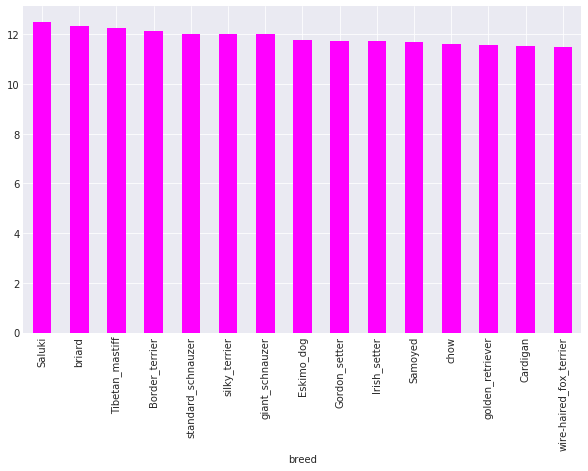

In [118]:
best_15.plot(kind='bar' , color='magenta', figsize=(10,6))

### Question #2: What stage of dog is popular posted?

In [119]:
master_df['dog_stage'].value_counts()

pupper            144
doggo              48
puppo              19
doggo, pupper       8
floofer             7
doggo, puppo        1
doggo, floofer      1
Name: dog_stage, dtype: int64

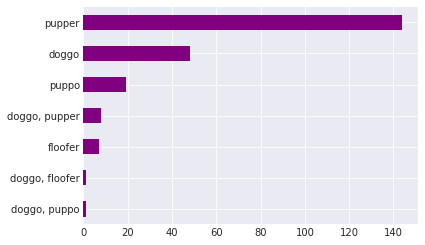

In [120]:
# check the value counts and sort values in descending order

master_df['dog_stage'].value_counts().sort_values(ascending=True).plot(kind='barh', color='purple')

### Question #3: Are high or low rates associated with particular breeds?

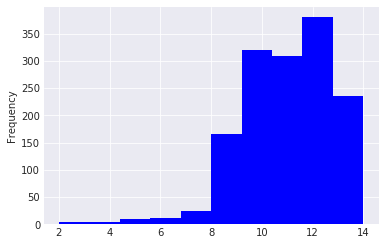

In [121]:
# Plot a histogram to show distrbution of rating_over_10

master_df['rating_over_10'].plot(kind='hist', color='blue')

In [122]:
# Check dogs having rating less than 8:
low_ratings = master_df[master_df['rating_over_10'] < 8]['breed'].value_counts()
low_ratings

Chihuahua                      6
pug                            4
Pembroke                       4
Airedale                       3
dalmatian                      2
soft-coated_wheaten_terrier    2
borzoi                         2
Boston_bull                    2
redbone                        2
Afghan_hound                   1
Japanese_spaniel               1
Labrador_retriever             1
Lakeland_terrier               1
Maltese_dog                    1
Rottweiler                     1
Brittany_spaniel               1
malinois                       1
Italian_greyhound              1
miniature_pinscher             1
miniature_schnauzer            1
Rhodesian_ridgeback            1
Samoyed                        1
Newfoundland                   1
Tibetan_terrier                1
Bedlington_terrier             1
Walker_hound                   1
Pekinese                       1
Saint_Bernard                  1
bloodhound                     1
flat-coated_retriever          1
black-and-

In [123]:
high_ratings = master_df[master_df['rating_over_10'] > 12]['breed'].value_counts()
high_ratings

golden_retriever                  31
Pembroke                          21
Labrador_retriever                15
Samoyed                           14
Chihuahua                         12
chow                               9
pug                                8
French_bulldog                     6
Eskimo_dog                         5
Cardigan                           5
cocker_spaniel                     4
Chesapeake_Bay_retriever           4
toy_poodle                         4
Saluki                             3
malamute                           3
Siberian_husky                     3
German_shepherd                    3
Great_Pyrenees                     3
borzoi                             3
kelpie                             3
American_Staffordshire_terrier     3
Pekinese                           3
Old_English_sheepdog               3
Rottweiler                         3
Lakeland_terrier                   3
basset                             3
Shetland_sheepdog                  2
b

### Question #4: Which breed has the highest number of occurrence in the twitter archive?

In [124]:
master_df['breed'].value_counts()[0:10]

golden_retriever      136
Labrador_retriever     92
Pembroke               88
Chihuahua              79
pug                    54
chow                   41
Samoyed                40
toy_poodle             38
Pomeranian             38
malamute               29
Name: breed, dtype: int64

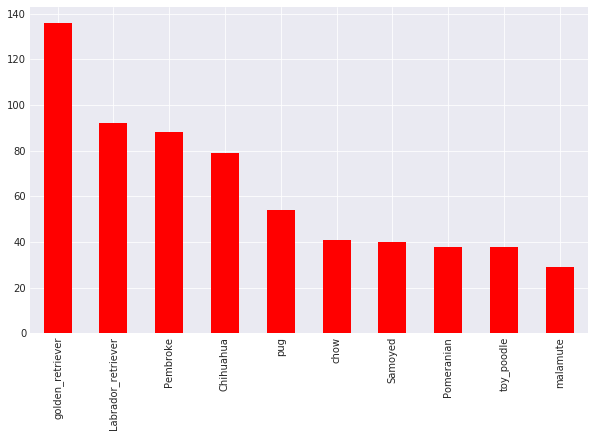

In [125]:
# check the value counts and sort values in descending order

master_df['breed'].value_counts()[0:10].sort_values(ascending=False).plot(kind='bar' , color ='red', figsize=(10,6))

### Question #5: Which breed got the highest number of retweets and favorites on average?

In [126]:
# group by breed and find mean of the retweet counts. sort values in descending order

best_in_retweets = master_df.groupby('breed')['retweet_count'].mean()[0:5].sort_values(ascending=False)
best_in_favorites = master_df.groupby('breed')['favorite_count'].mean()[0:5].sort_values(ascending=False)
best_in_favorites.index

Index(['Afghan_hound', 'Australian_terrier', 'American_Staffordshire_terrier',
       'Appenzeller', 'Airedale'],
      dtype='object', name='breed')

<Container object of 5 artists>

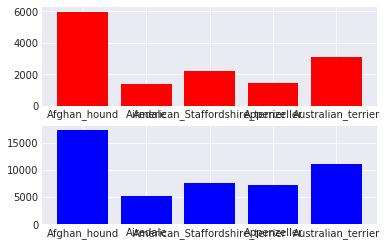

In [127]:
# use the subplot function to plot the two barcharts together 

plt.subplot(2,1,1)
plt.bar(best_in_retweets.index, best_in_retweets.values , color='red')

plt.subplot(2,1,2)
plt.bar(best_in_favorites.index , best_in_favorites.values, color='blue')

### Insights:
1. Saluki breed (rating=12.5) got the highest rating on average, followed by Briard and Tibetan_mastiff with 12.3 and 12.25, respectively.

2. The pupper dog stage is most popularly posted in the twitter archive.

3. Low or high rating is not associated with any particular breed. The ratings less than 8 or greater than 12 spread across so many breeds.  And almost all dogs posted have ratings above 8.

4. The golden_retriever breed is the most common breed in this twitter archive.

5. The Afghan_hound has the highest number of retweets and favorites followed by Australian_terrier, and American_Staffordshire_terrier in second and third places, respectively.

<a id='Visualization'></a>
## Visualization

### Question #1: Which breed got the highest rating on average?

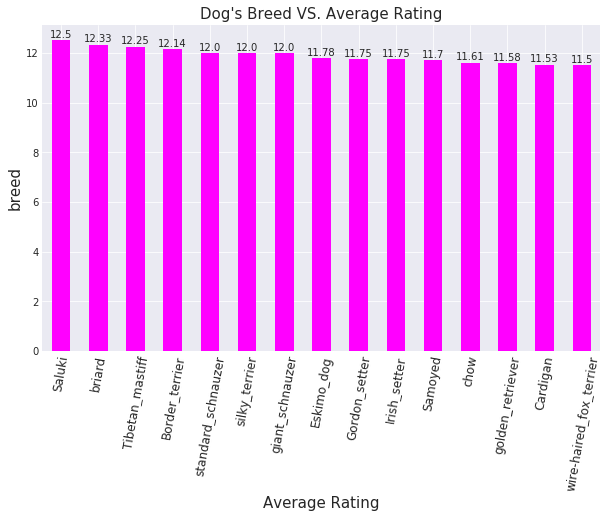

In [128]:
# plot a bar chart and set the axes labels and title. Rotate Xticks to accomodate all the breeds.

best_15.plot(kind='bar' , color='magenta', figsize=(10,6))
plt.xticks(rotation= 80, size= 12)
plt.xlabel('Average Rating' , size=15)
plt.ylabel('breed' , size= 15)
plt.title("Dog's Breed VS. Average Rating", size=15)

# use plt.text to label the bars in order to pick values easily
# create a for loop to iterate through the bars

y= master_df.groupby('breed')['rating_over_10'].mean().sort_values(ascending= False).round(2)
x= np.arange(0,15,1)

for xx,yy in zip(x,y):
    plt.text(xx, yy+.1 , yy , ha='center')

### Question #2: What stage of dog is popular posted?

Text(0.5,1,"Dog's stage VS Count")

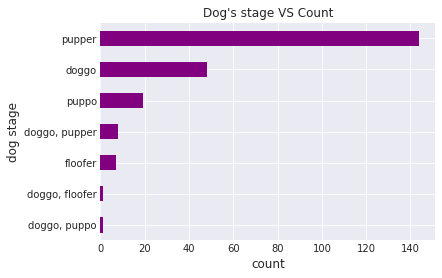

In [129]:
# plot a bar chart and set the axes labels and title. 

master_df['dog_stage'].value_counts().sort_values(ascending=True).plot(kind='barh', color='purple')
plt.xlabel('count',size=12)
plt.ylabel('dog stage', size=12)
plt.title("Dog's stage VS Count", size=12)

### Question #3: Are high or low rates associated with particular breeds?

Text(0.5,1,'Rating Distribution')

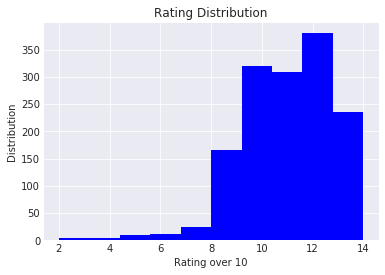

In [130]:
# plot a histogram and set the axes labels and title.

master_df['rating_over_10'].plot(kind='hist', color='blue')
plt.xlabel('Rating over 10')
plt.ylabel('Distribution')
plt.title("Rating Distribution", size=12)

### Question #4: Which breed has the highest number of occurrence in the twitter archive?

Text(0.5,1,"Dog's Breed VS Count")

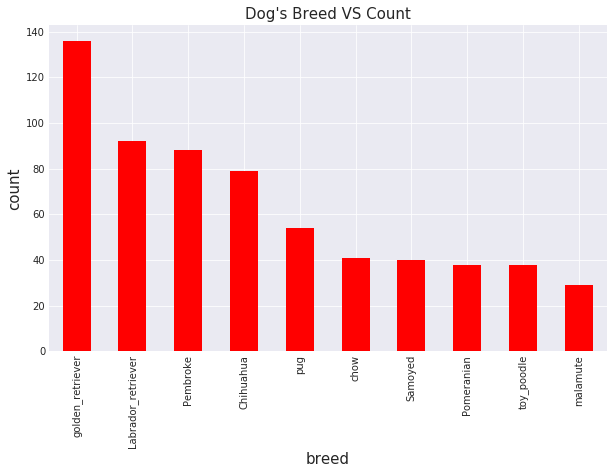

In [131]:
# plot a bar chart and set the axes labels and title. Sort values in descending order to pick differences in bar heights easily.

master_df['breed'].value_counts()[0:10].sort_values(ascending=False).plot(kind='bar' , color ='red', figsize=(10,6))
plt.xlabel('breed', size=15)
plt.ylabel('count', size=15)
plt.title("Dog's Breed VS Count" , size=15)

### Question #5: Which breed got the highest number of retweets and favorites on average?

([0, 1, 2, 3, 4], <a list of 5 Text xticklabel objects>)

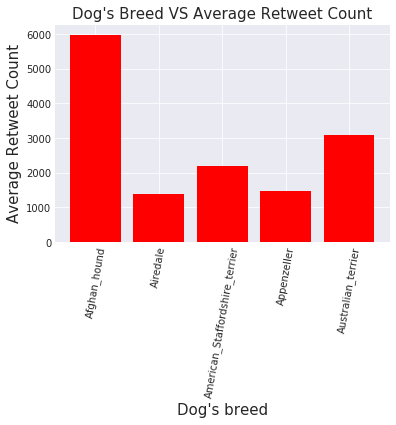

In [132]:
# plot a bar chart and set the axes labels and title. Rotate Xticks to accomodate all the breeds.

plt.bar(best_in_retweets.index, best_in_retweets.values , color='red')
plt.xlabel("Dog's breed", size=15)
plt.ylabel('Average Retweet Count', size=15)
plt.title("Dog's Breed VS Average Retweet Count" , size=15)
plt.xticks(rotation=80)

([0, 1, 2, 3, 4], <a list of 5 Text xticklabel objects>)

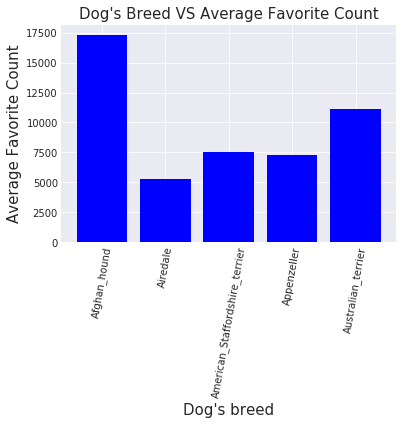

In [133]:
# plot a bar chart and set the axes labels and title. Rotate Xticks to accomodate all the breeds.

plt.bar(best_in_favorites.index, best_in_favorites.values , color='blue')
plt.xlabel("Dog's breed", size=15)
plt.ylabel('Average Favorite Count', size=15)
plt.title("Dog's Breed VS Average Favorite Count" , size=15)
plt.xticks(rotation=80)